In [1]:
#First we import everything
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import numpy as np
import re
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [2]:
df_churndata1 = pd.read_csv("TelcoCustomerChurn[MODIFIED].csv", index_col=0)
df_churndata1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,0.000000,0,0,1,0,...,0,0,0,0,0,1,0,0.115423,0.001275,0
1,5575-GNVDE,1,0,0,0,0.464789,1,0,1,1,...,1,0,0,0,1,0,1,0.385075,0.215867,0
2,3668-QPYBK,1,0,0,0,0.014085,1,0,1,1,...,0,0,0,0,0,1,1,0.354229,0.010310,1
3,7795-CFOCW,1,0,0,0,0.619718,0,0,1,1,...,1,1,0,0,1,0,0,0.239303,0.210241,0
4,9237-HQITU,0,0,0,0,0.014085,1,0,1,0,...,0,0,0,0,0,1,0,0.521891,0.015330,1


In [3]:
# We store our churn column in a separate variable and drop it from dataset

churn = df_churndata1.pop('Churn')
churn[:5]

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [4]:
df_churndata1 = df_churndata1.drop(columns="customerID")

In [5]:
#split the data into training and testing

data_train, data_test, target_train, target_test = train_test_split(df_churndata1, churn, test_size = 0.25)

In [6]:
#Baseline tree classifier

tree_churn = DecisionTreeClassifier(criterion='gini', max_depth=5)
tree_churn.fit(data_train, target_train)
tree_churn.score(data_test, target_test)

0.7832764505119454

In [7]:
#Baseline tree feature importance

for feature, importance in zip(df_churndata1.columns, tree_churn.feature_importances_):
    print("{} -> {}".format(feature, importance))

gender -> 0.0
SeniorCitizen -> 0.006064749998211857
Partner -> 0.0
Dependents -> 0.0019365752897662122
tenure -> 0.1651506902158135
PhoneService -> 0.011011007036024164
MultipleLines -> 0.0
InternetService -> 0.020197849414667405
OnlineSecurity -> 0.013912519782481697
OnlineBackup -> 0.0
DeviceProtection -> 0.0
TechSupport -> 0.02948654276949786
StreamingTV -> 0.0
StreamingMovies -> 0.006429318050551987
Contract -> 0.5394920444542364
PaperlessBilling -> 0.0012226350274137554
PaymentMethod -> 0.0
MonthlyCharges -> 0.17595506641555536
TotalCharges -> 0.029141001545779838


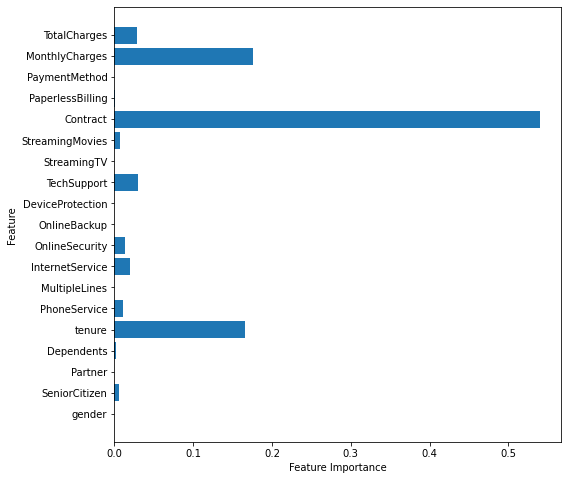

In [8]:
def plot_feature_importances(model):
    n_features = data_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), data_train.columns.values)
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")
    
plot_feature_importances(tree_churn)

In [9]:
#prediction with basic tree

pred = tree_churn.predict(data_test)
print(confusion_matrix(target_test, pred))
print(classification_report(target_test, pred))


# The results will vary but I ran it once and got the below
#True positives = 1190
#True negatives = 209


#false positives = 112
#false negatiaves = 247

[[1165  133]
 [ 248  212]]
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1298
           1       0.61      0.46      0.53       460

    accuracy                           0.78      1758
   macro avg       0.72      0.68      0.69      1758
weighted avg       0.77      0.78      0.77      1758



In [10]:
churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [11]:
#bagged trees

bagged_tree = BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth= 5), n_estimators=20)

In [12]:
bagged_tree.fit(data_train, target_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                  n_estimators=20)

In [13]:
bagged_tree.score(data_train, target_train)

0.8067880166856276

In [14]:
bagged_tree.score(data_test, target_test)

0.7997724687144482

In [15]:
#Random Forests

forest = RandomForestClassifier(n_estimators=1000, max_depth=5, max_features=10)

In [16]:
forest.fit(data_train, target_train)

RandomForestClassifier(max_depth=5, max_features=10, n_estimators=1000)

In [17]:
forest.score(data_train, target_train)

0.8075464543041335

In [18]:
forest.score(data_test, target_test)

0.8077360637087599

In [19]:
pred = forest.predict(data_test)
print(confusion_matrix(target_test, pred))
print(classification_report(target_test, pred))

[[1189  109]
 [ 229  231]]
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1298
           1       0.68      0.50      0.58       460

    accuracy                           0.81      1758
   macro avg       0.76      0.71      0.73      1758
weighted avg       0.80      0.81      0.80      1758



In [20]:
# pred = forest1.predict(data_test)
cf_matrix = confusion_matrix(target_test, pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

NameError: name 'sns' is not defined

In [ ]:
plot_feature_importances(forest)

In [ ]:
#Baseline tree feature importance

for feature, importance in zip(df_churndata1.columns, forest.feature_importances_):
    print("{} -> {}".format(feature, importance))

In [ ]:
importances = pd.DataFrame({'feature':data_train.columns,'importance':np.round(forest.feature_importances_,3)})

In [ ]:
importances = importances.sort_values('importance',ascending=False).set_index('feature')

In [21]:
importances.plot.bar()

NameError: name 'importances' is not defined

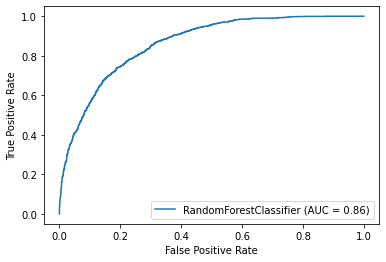

In [22]:
# plotting the ROC Curve

from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
plot_roc_curve(forest, data_train, target_train)

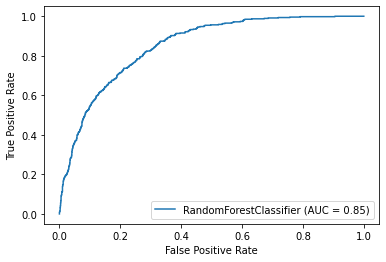

In [23]:
plot_roc_curve(forest, data_test, target_test)

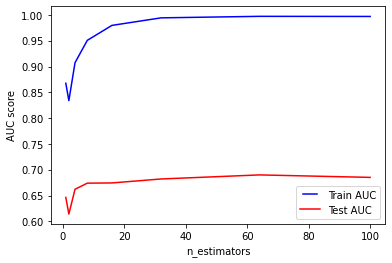

In [24]:
#num forests
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100]
# I removed 200, 500, 1000 because it was just leading to 1.00, maybe keep it in?
train_results = []
test_results = []
for estimator in n_estimators:
   rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
   rf.fit(data_train, target_train)
   train_pred = rf.predict(data_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(target_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(data_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(target_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label="Train AUC")
line2, = plt.plot(n_estimators, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("n_estimators")
plt.show()

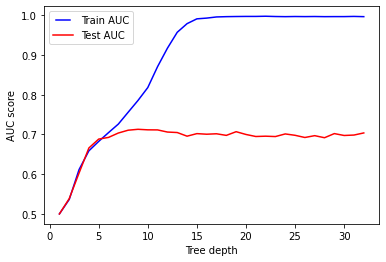

In [25]:
# maxdepth
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1)
   rf.fit(data_train, target_train)
   train_pred = rf.predict(data_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(target_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(data_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(target_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_depths, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

In [26]:
#nume_samples_split - min_samples_split
min_samples_split = np.arange(2,32,1)
train_results = []
test_results = []
for min_sample_split in min_samples_split:
   rf = RandomForestClassifier(min_samples_split=min_sample_split, n_jobs=-1)
   rf.fit(data_train, target_train)
   train_pred = rf.predict(data_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(target_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(data_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(target_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_samples_split, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_samples_split, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min_samples_split')
plt.show()

NameError: name 'max_samples_split' is not defined

In [ ]:
max_samples_split = np.arange(2,32,1)
max_samples_split

In [ ]:
#maxleaves
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
   rf = RandomForestClassifier(min_samples_leaf=min_samples_leaf)
   rf.fit(data_train, target_train)
   train_pred = rf.predict(data_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(target_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(data_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(target_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results, 'b', label="Train AUC")
line2, = plt.plot(min_samples_leafs, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples leaf')
plt.show()

In [ ]:
#maxfeatures
max_features = list(range(1,df_churndata1.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
   rf = RandomForestClassifier(max_features=max_feature)
   rf.fit(data_train, target_train)
   train_pred = rf.predict(data_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(target_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(data_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(target_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_features, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_features, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('max features')
plt.show()

In [ ]:
max_features = list(range(1,df_churndata1.shape[1]))
max_features

In [31]:
# I want to try RandomGridSearchCV

from sklearn.model_selection import RandomizedSearchCV
import pprint

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 15, num = 15)]
# Number of features to consider at every split
max_features = ['auto', None]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 15, num = 15)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [int(x) for x in np.linspace(1, 10, num = 10)]
# Minimum number of samples required at each leaf node
min_samples_leaf = [int(x) for x in np.linspace(1, 10, num = 10)]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint.pprint(random_grid)


{'bootstrap': [True, False],
 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, None],
 'max_features': ['auto', None],
 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]}


In [32]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# rf_grid = GridSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_grid = GridSearchCV(estimator = rf, param_grid=random_grid, scoring='accuracy', cv=3, verbose=2, n_jobs=-1)
# Fit the random search model
rf_grid.fit(data_train, target_train)

Fitting 3 folds for each of 96000 candidates, totalling 288000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 360 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 1984 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 4248 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done 7168 tasks      | elapsed:   22.3s
[Parallel(n_jobs=-1)]: Done 10728 tasks      | elapsed:   32.6s
[Parallel(n_jobs=-1)]: Done 14944 tasks      | elapsed:   45.5s
[Parallel(n_jobs=-1)]: Done 19800 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 25312 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 31464 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 38272 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 45720 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 53824 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 62568 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 71968 

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, None],
                         'max_features': ['auto', None],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15]},
             scoring='accuracy', verbose=2)

In [33]:
rf_grid.best_params_

{'bootstrap': True,
 'max_depth': 9,
 'max_features': 'auto',
 'min_samples_leaf': 7,
 'min_samples_split': 6,
 'n_estimators': 14}

In [34]:
#we will try the recommendation above

forest1 = RandomForestClassifier(n_estimators=14, max_depth=9, max_features='auto', min_samples_split=6, min_samples_leaf=7, bootstrap=True)
forest1.fit(data_train, target_train)
forest1.score(data_train, target_train)

0.8327645051194539

In [35]:
forest1.score(data_test, target_test)

0.7974971558589306

In [36]:
pred1 = forest1.predict(data_test)
cf_matrix = confusion_matrix(target_test, pred1)

In [37]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

NameError: name 'sns' is not defined

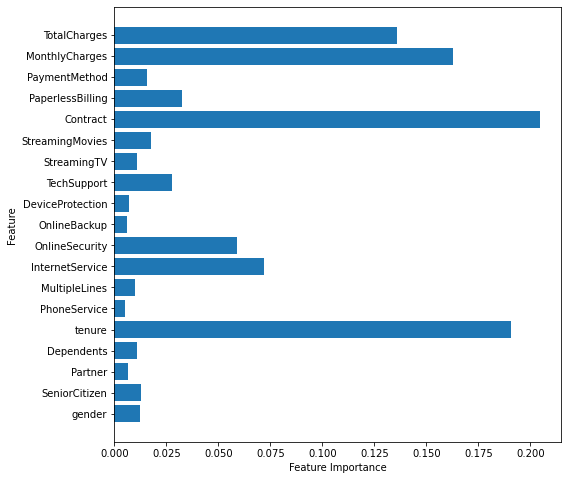

In [38]:
plot_feature_importances(forest1)

<AxesSubplot:xlabel='feature'>

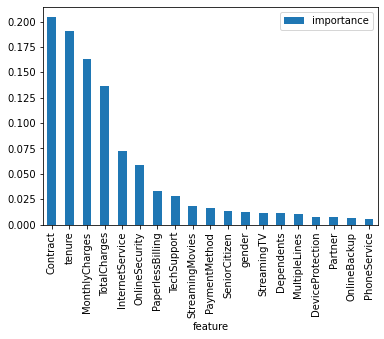

In [40]:
importances = pd.DataFrame({'feature':data_train.columns,'importance':np.round(forest1.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.plot.bar()
